## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', '.spyproject', 'application.py', 'heart.csv', 'Heart_disease_prediction.ipynb', 'naive_bayes.pkl', 'README.md', 'RF.pkl', 'static', 'templates']


## II. Importing and understanding our dataset 

In [8]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [9]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [10]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [11]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0


#### Description

In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [16]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [17]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [18]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [19]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [20]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


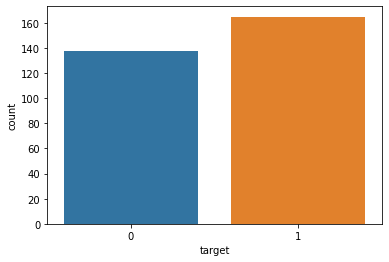

In [21]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [22]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [23]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

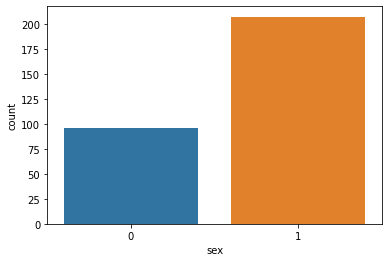

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame
sns.countplot(data=dataset, x="sex")
plt.show()


In [25]:
# import seaborn as sns

# # Assuming your dataset is a pandas DataFrame
# sns.barplot(x="sex", y="y")


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [26]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

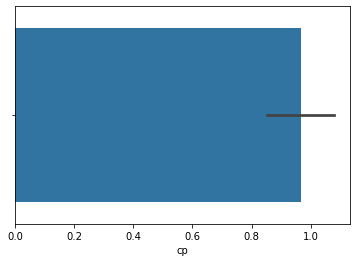

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame
sns.barplot(data=dataset, x="cp")
plt.show()


##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [28]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [29]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

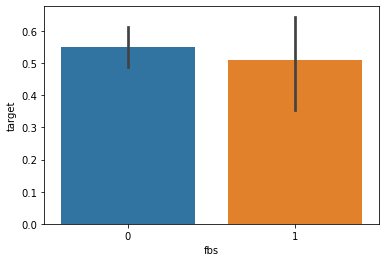

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["fbs"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


##### Nothing extraordinary here

### Analysing the restecg feature

In [31]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

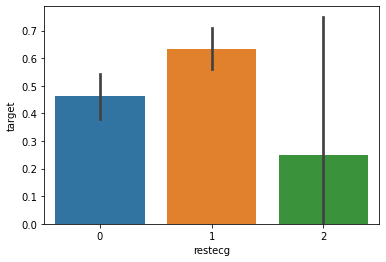

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["restecg"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [33]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

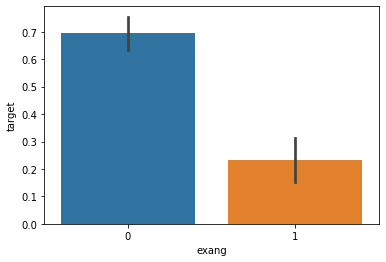

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["exang"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [35]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

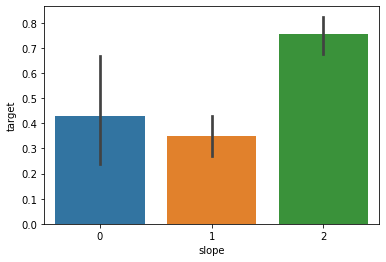

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["slope"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [37]:
#number of major vessels (0-3) colored by flourosopy

In [38]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

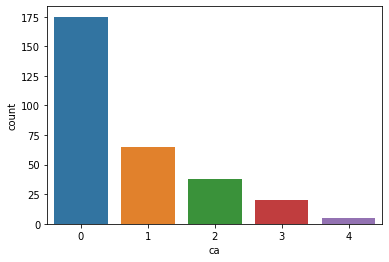

In [39]:
sns.countplot(dataset["ca"])

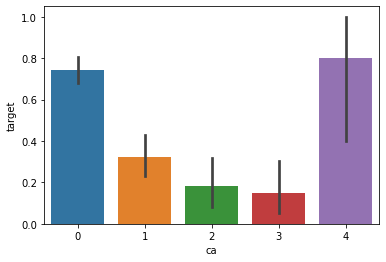

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["ca"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


##### ca=4 has astonishingly large number of heart patients

In [41]:
### Analysing the 'thal' feature

In [42]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

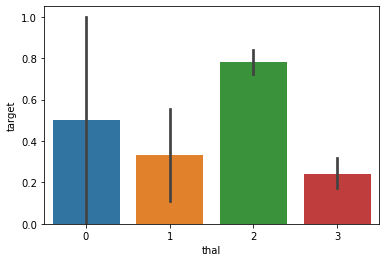

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame and you have some numerical data in "y"
sns.barplot(x=dataset["thal"], y=y)  # Replace 'y' with your actual numerical data
plt.show()


<AxesSubplot:xlabel='thal', ylabel='Density'>

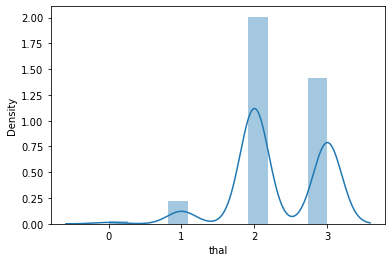

In [44]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [45]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [46]:
X_train.shape

(242, 13)

In [47]:
X_test.shape

(61, 13)

In [48]:
Y_train.shape

(242,)

In [49]:
Y_test.shape

(61,)

## V. Model Fitting

In [50]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [52]:
Y_pred_lr.shape

(61,)

In [53]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [55]:
Y_pred_nb.shape

(61,)

In [56]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [57]:
import pickle
pickle.dump(nb,open("naive_bayes.pkl","wb"))
pickle.load(open("naive_bayes.pkl","rb"))

GaussianNB()

### SVM

In [58]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [59]:
Y_pred_svm.shape

(61,)

In [60]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [62]:
Y_pred_knn.shape

(61,)

In [63]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [65]:
print(Y_pred_dt.shape)

(61,)


In [66]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
# print(max_accuracy)
# print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
import pickle
pickle.dump(rf,open("RF.pkl","wb"))
pickle.load(open("RF.pkl","rb"))

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 8)})

# Assuming 'algorithms' and 'scores' are lists or arrays
sns.barplot(x=algorithms, y=scores)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()


### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>

In [ ]:
import pickle

# Load the trained model
model = pickle.load(open("RF.pkl", "rb"))

# Define a function to predict heart disease
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    prediction = model.predict(input_data)
    return prediction[0]

# Get user input for features
age = int(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter resting blood pressure: "))
chol = int(input("Enter cholesterol level: "))
fbs = int(input("Enter fasting blood sugar level (0 or 1): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = int(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise-induced angina (0 or 1): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thallium stress test result (0-3): "))

predicted_target = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
if predicted_target == 1:
    result = "Likely to have heart disease"
else:
    result = "Not likely to have heart disease"

print(f"The model predicts that the person is {result}")


In [ ]:
# Example usage:
age = 63
sex = 1
cp = 3
trestbps = 145
chol = 233
fbs = 1
restecg = 0
thalach = 150
exang = 0
oldpeak = 2.3
slope = 0
ca = 0
thal = 1